# Random Forest

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt  
import seaborn as sns 
from IPython.display import display

In [2]:
sns.set_style('whitegrid')
plt.style.use('seaborn-dark-palette')

In [21]:
data_01 = pd.read_csv('result/res_rf_tuned_median.csv' , index_col=0).reset_index(drop=True)
data_01.insert(0 , 'net_type' , ['rf_tuned']*len(data_01))
data_02 = pd.read_csv('result/res_rf_vanila_median.csv' , index_col=0).reset_index(drop=True)
data_02.insert(0 , 'net_type' , ['rf_vanila']*len(data_02))
data = pd.concat([data_01, data_02 ]).reset_index(drop=True)
#display(data.head(2))
feat =  pd.read_csv('result/feat_imp.csv').reset_index(drop=True)
feat

,Unnamed: 0,feat_name,feat_imp
0,0,var_inter_index,0.116844
1,1,var_inter_prob,0.098465
2,2,photflux_aper_u,0.048618
3,3,var_inter_sigma,0.043734
4,4,photflux_aper_hilim_u,0.038030
...,...,...,...
87,87,bb_stat,0.000537
88,88,bb_nh_hilim,0.000342
89,89,flux_bb_lolim,0.000243
90,90,bb_nh,0.000122


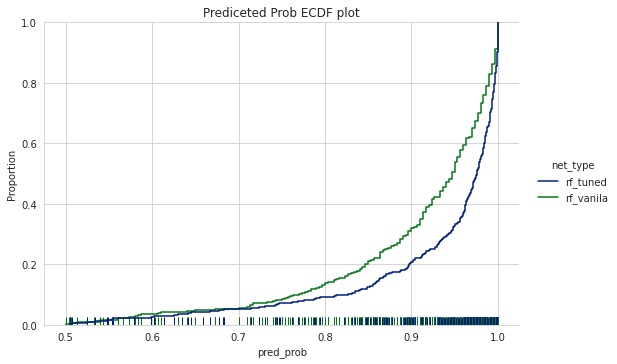

In [5]:

sns.displot(
    data = data , 
    x = 'pred_prob' , 
    kind = 'ecdf', 
    hue = 'net_type' , 
    rug=True , 
    height=5 , aspect=6/4
)
plt.title('Prediceted Prob ECDF plot')

plt.savefig('result/prob_comparison.jpg')
plt.show()

In [8]:
data = data[data['net_type']=='rf_tuned']
x_data = data.copy().reset_index(drop=True)
x_data = x_data.drop(columns=['true_class' , 'pred_class' , 'pred_prob' ,'src_id' , 'src_n' ,'truth' , 'th_class' , 'is_ok' , 'clf_type' , 'NS_prob' , 'BH_prob' , 'net_type'])
x_data.head(2)



,var_inter_index,var_inter_prob,photflux_aper_u,var_inter_sigma,photflux_aper_hilim_u,var_max,var_mean,flux_aper_hilim_h,var_min,hard_hs_lolim,...,brems_stat,flux_brems,flux_powlaw,powlaw_stat,bb_kt_hilim,bb_stat,bb_nh_hilim,flux_bb_lolim,bb_nh,bb_nh_lolim
0,0.3,0.387872,0.391946,0.000012,0.126772,0.000168,0.000706,0.269623,0.000576,0.229537,...,0.391946,0.391946,0.391946,0.391946,0.391946,0.391946,0.391946,0.391946,3.919457e-01,0.391946
1,1.0,1.000000,0.550496,0.000329,0.599817,0.004573,0.030587,0.647738,0.027086,0.410263,...,0.043549,0.042389,0.041554,0.053613,0.005755,0.383370,0.001446,0.026640,1.543364e-09,0.391946


## Result

In [9]:
total = len(data)
print('Total samples' , total)
am_clf = len(data[data['th_class']=='X'])
print('Ambiguous calssification : ' , am_clf)
wrong_clf = len(data[data['truth']==0])
print('Wrong calssification : ' , wrong_clf)

Total samples 460
Ambiguous calssification :  42
Wrong calssification :  0


## Probability Correlation

In [10]:
res_bh = data[data['pred_class'] == 'BH'].drop(columns=['NS_prob' , 'BH_prob'])
res_ns = data[data['pred_class'] == 'NS'].drop(columns=['NS_prob' , 'BH_prob'])
th_x = data[data['th_class'] == 'X'].drop(columns=['NS_prob' , 'BH_prob'])
th_bh = data[data['th_class'] == 'BH'].drop(columns=['NS_prob' , 'BH_prob'])
th_ns = data[data['th_class'] == 'NS'].drop(columns=['NS_prob' , 'BH_prob'])

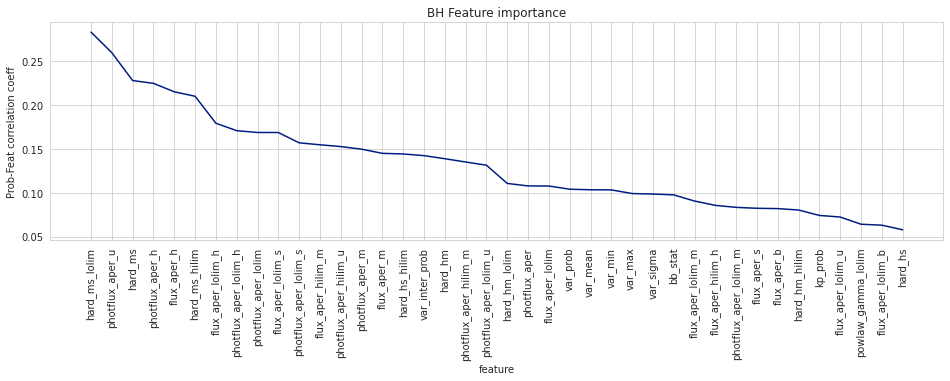

In [11]:
th_bh_corr = th_bh.corr().dropna(how='all' , axis=0).dropna(how='all' , axis=1).abs()
th_bh_corr = th_bh_corr[['pred_prob']][2:].sort_values(by='pred_prob' , ascending=False)
#display(th_bh_corr)
feat_num = 40
feat_names = th_bh_corr.index.to_list()[:feat_num]
feat_values = th_bh_corr['pred_prob'][:feat_num]
plt.figure(figsize=(16 , 4))
plt.plot(feat_names , feat_values)
plt.xticks(rotation=90)
plt.ylabel('Prob-Feat correlation coeff')
plt.xlabel('feature')
plt.savefig('result/bh_feat_imp.jpg')
plt.title('BH Feature importance')
#plt.subplots_adjust(bottom=0.8)

plt.show()

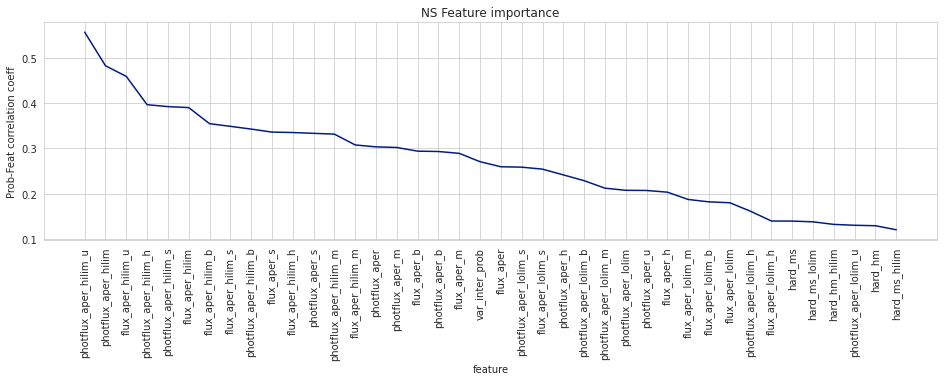

In [12]:
th_ns_corr = th_ns.corr().dropna(how='all' , axis=0).dropna(how='all' , axis=1).abs()
th_ns_corr = th_ns_corr[['pred_prob']][2:].sort_values(by='pred_prob' , ascending=False)
feat_num = 40
feat_names = th_ns_corr.index.to_list()[:feat_num]
feat_values = th_ns_corr['pred_prob'][:feat_num]
plt.figure(figsize=(16 , 4))
plt.plot(feat_names , feat_values)
plt.xticks(rotation=90)
plt.ylabel('Prob-Feat correlation coeff')
plt.xlabel('feature')
plt.savefig('result/ns_feat_imp.jpg')
plt.title('NS Feature importance')
plt.show()

## Gini Impurity based feature importance

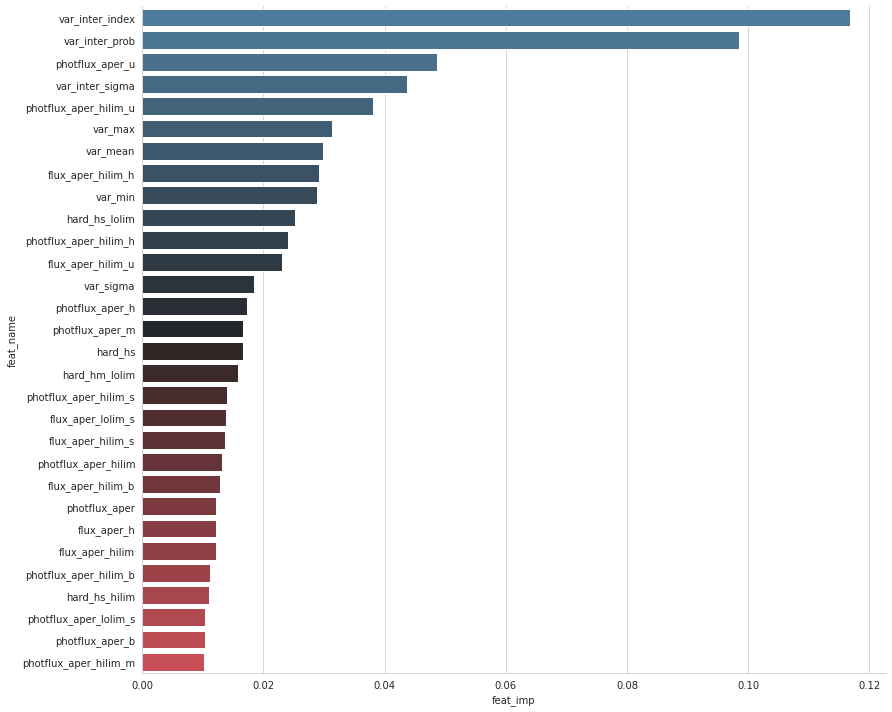

In [25]:
palette = sns.diverging_palette(240, 10, n=30 , center='dark')
sns.catplot(
    data = feat.iloc[:30,:] ,
    y = 'feat_name' , 
    x = 'feat_imp'  ,
    kind = 'bar' ,
    height=10 , 
    aspect=10/8 , 
    palette = palette
)
plt.show()

In [62]:
palette = sns.diverging_palette(240, 10, n=3 , center='dark')
ax = sns.displot(
    data = data , kind='kde',
    x = 'photflux_aper_u' ,# y = 'flux_aper_hilim_u' , 
    col = 'is_ok' , 
    hue = 'th_class' , 
    palette = palette ,
    #stat = 'density'
)

plt.show()

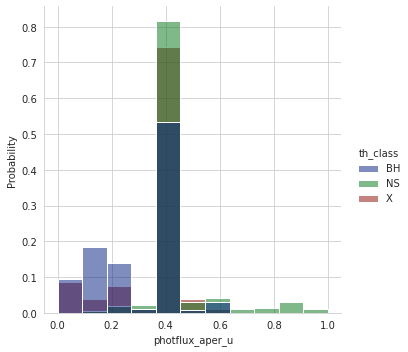

In [38]:
sns.displot(data, x="photflux_aper_u", hue="th_class", stat="probability" , common_norm = False , )

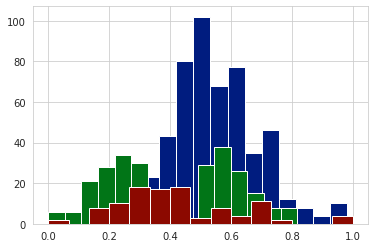

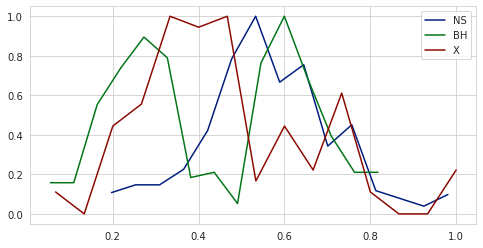

In [60]:
import numpy as np 
feat = 'flux_aper_hilim_h'
x1 = data[data['th_class']=='NS'][feat]
x2 = data[data['th_class']=='BH'][feat]
x3 = data[data['th_class']=='X'][feat]
y1 , x1 , _ = plt.hist(x1 , bins=15)
y2 , x2 , _ = plt.hist(x2 , bins=15)
y3 , x3 , _ = plt.hist(x3 , bins=15)
y1 =  y1 / np.amax(y1)
y2 =  y2 / np.amax(y2)
y3 =  y3 / np.amax(y3)
plt.show()
plt.figure(figsize=(8,4))
plt.plot(x1[1:],y1 , label = 'NS')
plt.plot(x2[1:],y2 , label = 'BH')
plt.plot(x3[1:],y3 , label = 'X')
plt.legend()
plt.show()
#print(y1)
